In [8]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from pandas import Series
import numpy as np
from pandas import read_csv

In [10]:
series = pd.read_csv('daily-total-female-births.csv',header=0, index_col=0)

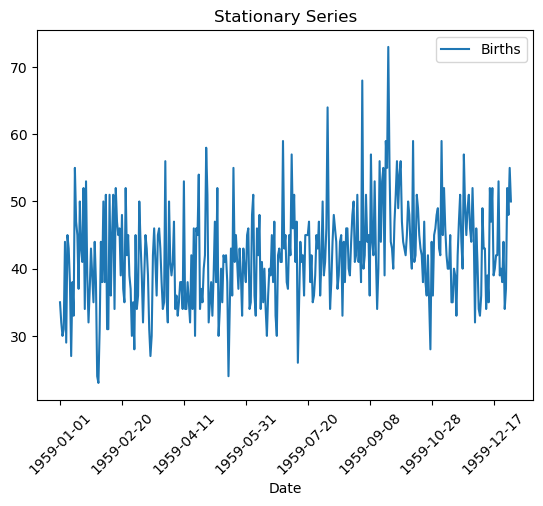

In [11]:
series.plot()
plt.title('Stationary Series')
plt.xticks(rotation = 45)
plt.show()

In [12]:
X = series.values

In [13]:
result = adfuller(X)

In [14]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


# Non stationary series

In [16]:
series_2 = pd.read_csv('airline-passengers_data.csv',header=0, index_col=0)

In [17]:
X_2 = series_2.values

In [18]:
result_2 = adfuller(X_2)

In [19]:
print('ADF Statistic: %f' % result_2[0])
print('p-value: %f' % result_2[1])
print('Critical Values:')
for key, value in result_2[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


# Differencing

C:\Users\rikes\AppData\Local\Temp\ipykernel_6496\3444122444.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series_3 = read_csv('shampoo_sales.csv', parse_dates=[0], header=0, index_col=0, date_parser=dateparse)


<Axes: xlabel='Month'>

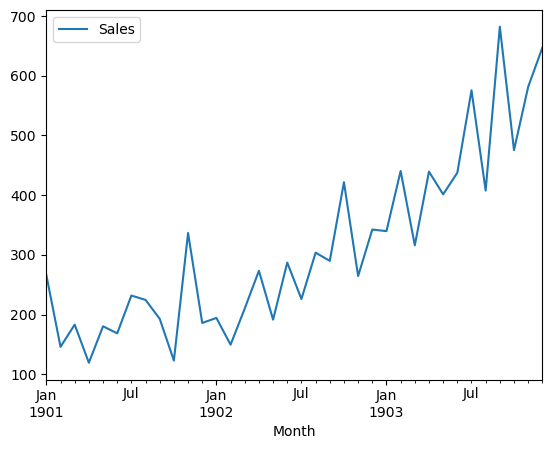

In [20]:
from datetime import datetime
dateparse = lambda x: datetime.strptime('190'+x, '%Y-%m')
series_3 = read_csv('shampoo_sales.csv', parse_dates=[0], header=0, index_col=0, date_parser=dateparse)
series_3.plot()

In [21]:
X_3=series_3.values

In [22]:
def difference(dataset, interval=1):
 diff = list()
 for i in range(interval, len(dataset)):
     value = dataset[i] - dataset[i - interval]
     diff.append(value)
 return Series(diff)

In [23]:
diff=difference(X_3)

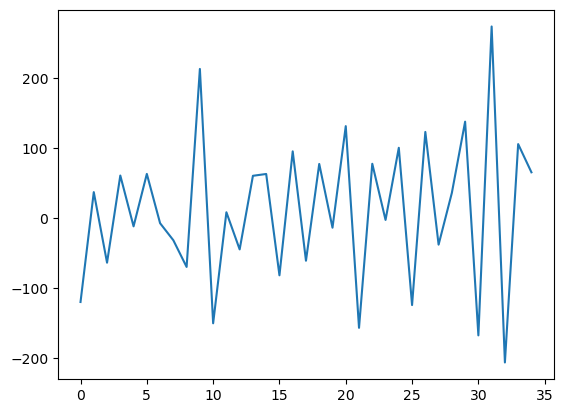

In [24]:
plt.plot(diff)

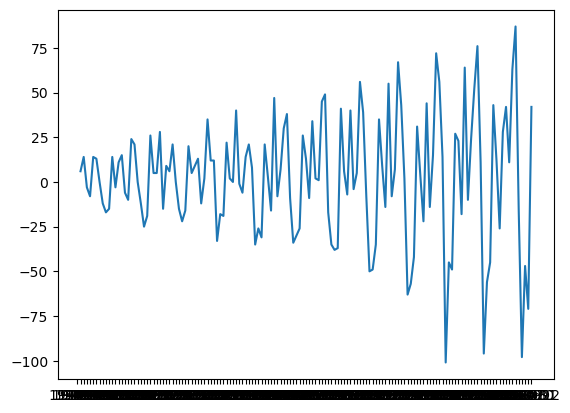

In [25]:
diff_2 = series_2.diff()
plt.plot(diff_2)
plt.show()

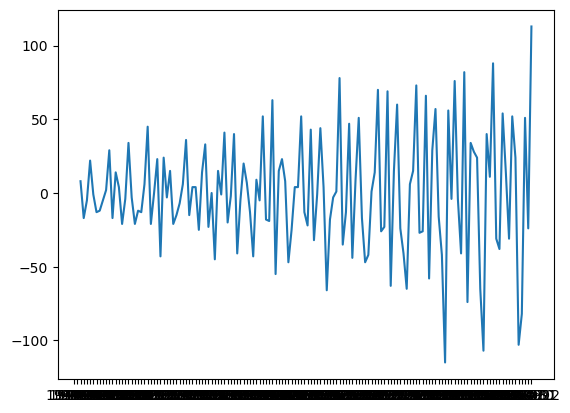

In [26]:
diff_2 = series_2.diff().diff()
plt.plot(diff_2)
plt.show()